# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
print(weather_api_key) 

0fe374e9b438c26b6aa0548e9ee30a93


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
uom = "metric"
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={uom}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | anadyr
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | kingston
Processing Record 6 of Set 1 | iquique
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | saint-joseph
Processing Record 12 of Set 1 | toppenish
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | ketou
Processing Record 15 of Set 1 | cestos city
Processing Record 16 of Set 1 | mount isa
Processing Record 17 of Set 1 | fang
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | bilibino
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1

Processing Record 41 of Set 4 | ubari
Processing Record 42 of Set 4 | ijuw
City not found. Skipping...
Processing Record 43 of Set 4 | yanykurgan
Processing Record 44 of Set 4 | tazacorte
Processing Record 45 of Set 4 | atvidaberg
Processing Record 46 of Set 4 | miri
Processing Record 47 of Set 4 | kapuskasing
Processing Record 48 of Set 4 | orapa
Processing Record 49 of Set 4 | merano
Processing Record 0 of Set 5 | laayoune plage
City not found. Skipping...
Processing Record 1 of Set 5 | takamaka
City not found. Skipping...
Processing Record 2 of Set 5 | st. john's
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | antofagasta
Processing Record 5 of Set 5 | kuanda
Processing Record 6 of Set 5 | kish
Processing Record 7 of Set 5 | yangor
City not found. Skipping...
Processing Record 8 of Set 5 | dunedin
Processing Record 9 of Set 5 | weno
Processing Record 10 of Set 5 | ilulissat
Processing Record 11 of Set 5 | howrah
Processing Record 12 of Set 5 | vilyuchinsk
Proces

Processing Record 33 of Set 8 | salalah
Processing Record 34 of Set 8 | hobyo
Processing Record 35 of Set 8 | greymouth
Processing Record 36 of Set 8 | elesbao veloso
Processing Record 37 of Set 8 | lebowakgomo
Processing Record 38 of Set 8 | apodi
Processing Record 39 of Set 8 | carbonear
Processing Record 40 of Set 8 | saldanha
Processing Record 41 of Set 8 | ambon
Processing Record 42 of Set 8 | upper dir
Processing Record 43 of Set 8 | kitimat
Processing Record 44 of Set 8 | aykol
City not found. Skipping...
Processing Record 45 of Set 8 | kerikeri
Processing Record 46 of Set 8 | novo aripuana
Processing Record 47 of Set 8 | kilindoni
Processing Record 48 of Set 8 | raduzhny
Processing Record 49 of Set 8 | hammerfest
Processing Record 0 of Set 9 | lucapa
Processing Record 1 of Set 9 | tromso
Processing Record 2 of Set 9 | ust'-ilimsk
Processing Record 3 of Set 9 | santa cruz
Processing Record 4 of Set 9 | sinton
Processing Record 5 of Set 9 | la passe
Processing Record 6 of Set 9 |

Processing Record 23 of Set 12 | tidjikja
Processing Record 24 of Set 12 | hailun
Processing Record 25 of Set 12 | princeville
Processing Record 26 of Set 12 | rajaldesar
Processing Record 27 of Set 12 | luanda
Processing Record 28 of Set 12 | freetown
Processing Record 29 of Set 12 | oamaru
Processing Record 30 of Set 12 | banda aceh
Processing Record 31 of Set 12 | barra dos coqueiros
Processing Record 32 of Set 12 | mossel bay
Processing Record 33 of Set 12 | hasilpur
Processing Record 34 of Set 12 | calvinia
Processing Record 35 of Set 12 | geneseo
Processing Record 36 of Set 12 | imaricho-ko
Processing Record 37 of Set 12 | port alfred
Processing Record 38 of Set 12 | markovo
Processing Record 39 of Set 12 | federal
Processing Record 40 of Set 12 | arkhangel'sk
Processing Record 41 of Set 12 | polyarnyy
Processing Record 42 of Set 12 | sibut
Processing Record 43 of Set 12 | tobruk
Processing Record 44 of Set 12 | malaga
Processing Record 45 of Set 12 | vanino
Processing Record 46 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,2.98,95,36,2.23,CL,1700181613
1,waitangi,-43.9535,-176.5597,13.58,97,100,9.72,NZ,1700181615
2,anadyr,64.7500,177.4833,-17.72,70,0,4.00,RU,1700181652
3,iqaluit,63.7506,-68.5145,-1.15,86,75,12.35,CA,1700181606
4,kingston,17.9970,-76.7936,25.53,91,75,5.14,JM,1700181585


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.98,95,36,2.23,CL,1700181613
1,waitangi,-43.9535,-176.5597,13.58,97,100,9.72,NZ,1700181615
2,anadyr,64.7500,177.4833,-17.72,70,0,4.00,RU,1700181652
3,iqaluit,63.7506,-68.5145,-1.15,86,75,12.35,CA,1700181606
4,kingston,17.9970,-76.7936,25.53,91,75,5.14,JM,1700181585


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [15]:
# Created a function to reproduce the scatter plots
def build_scatter(x,y):
    plt.scatter(city_data_df[x], city_data_df[y], c="red", marker="X", edgecolor="black", linewidths=0.5)
    plt.tight_layout()
    plt.grid()

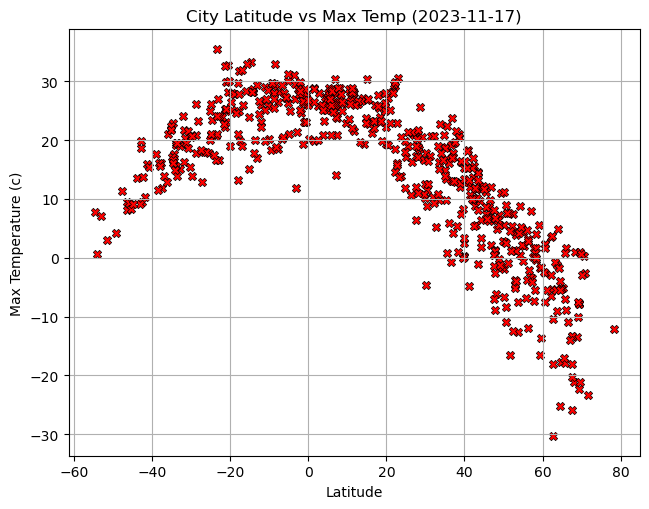

In [16]:
# Build scatter plot for latitude vs. temperature
build_scatter("Lat", "Max Temp")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.title(f"City Latitude vs Max Temp ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig1.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude Vs. Humidity

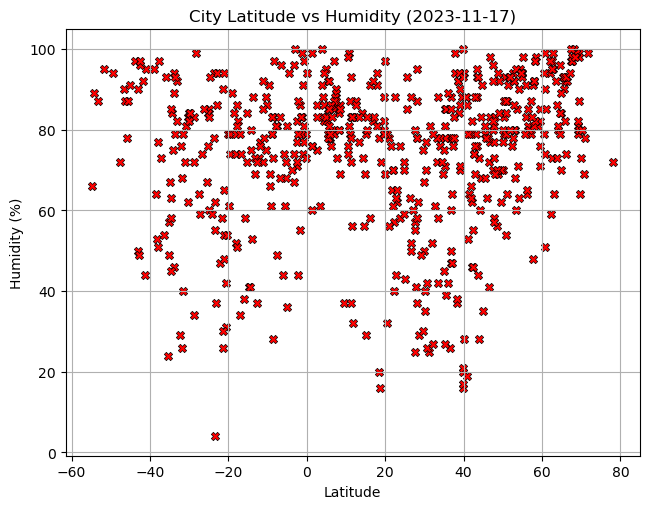

In [18]:
# Build the scatter plots for latitude vs. humidity
build_scatter("Lat", "Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig2.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

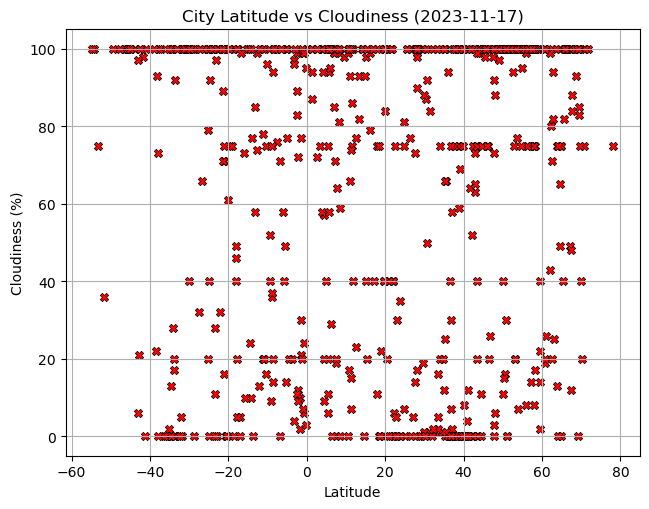

In [19]:
# Build the scatter plots for latitude vs. cloudiness
build_scatter("Lat", "Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig3.png", bbox_inches="tight")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

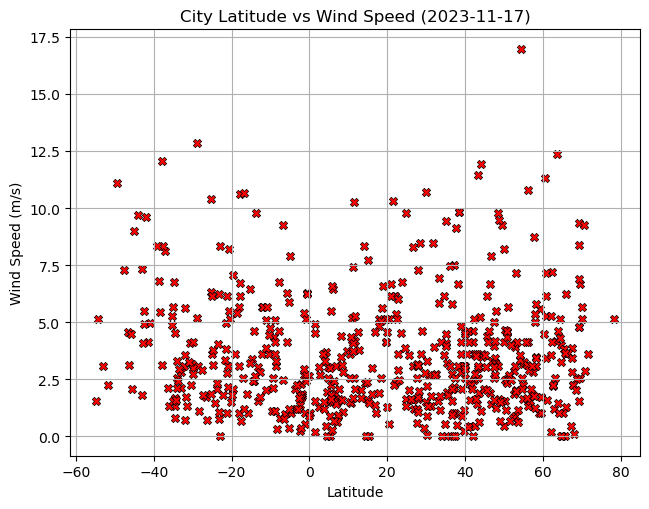

In [20]:
# Build the scatter plots for latitude vs. wind speed
build_scatter("Lat","Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({pd.to_datetime(city_data_df['Date'], unit='s').dt.strftime('%Y-%m-%d').max()})")

# Save the figure
plt.savefig("output_data/Fig4.png", bbox_inches="tight")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="X", edgecolor="black", linewidths=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,anadyr,64.7500,177.4833,-17.72,70,0,4.00,RU,1700181652
3,iqaluit,63.7506,-68.5145,-1.15,86,75,12.35,CA,1700181606
4,kingston,17.9970,-76.7936,25.53,91,75,5.14,JM,1700181585
6,georgetown,5.4112,100.3354,28.30,92,20,0.00,MY,1700181414
10,toppenish,46.3774,-120.3087,8.61,41,20,1.92,US,1700181801


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.98,95,36,2.23,CL,1700181613
1,waitangi,-43.9535,-176.5597,13.58,97,100,9.72,NZ,1700181615
5,iquique,-20.2208,-70.1431,19.02,79,61,1.52,CL,1700181797
7,papatowai,-46.5619,169.4708,8.17,90,100,4.57,NZ,1700181604
8,adamstown,-25.0660,-130.1015,20.95,85,100,3.63,PN,1700181603


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8851106574072048


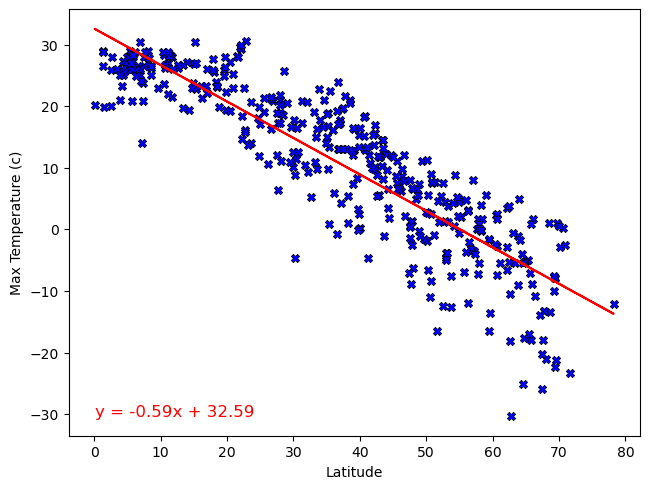

In [26]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

The r-value is: 0.7323554306959152


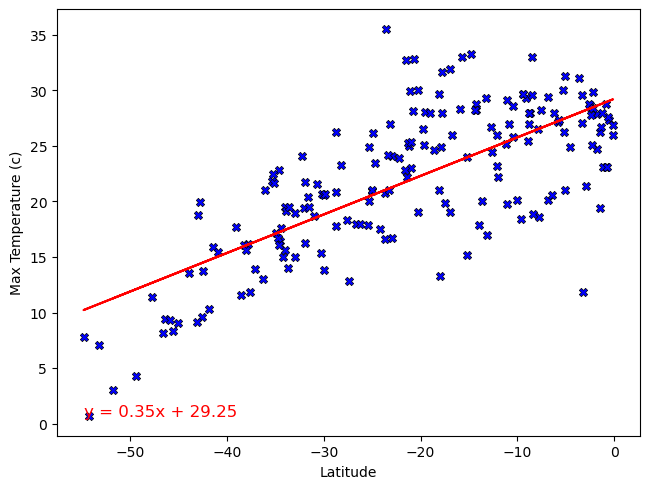

In [27]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (c)")
plt.show()

**Discussion about the linear relationship:** - With an 'r-value' of -0.88 and 0.73, there's a strong correlation between the distance from the equator and the Max Temperature
    - The northern hemisphere has a strong negative correlation
    - The southern hemisphere has a strong positive correlation

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.15453983126520332


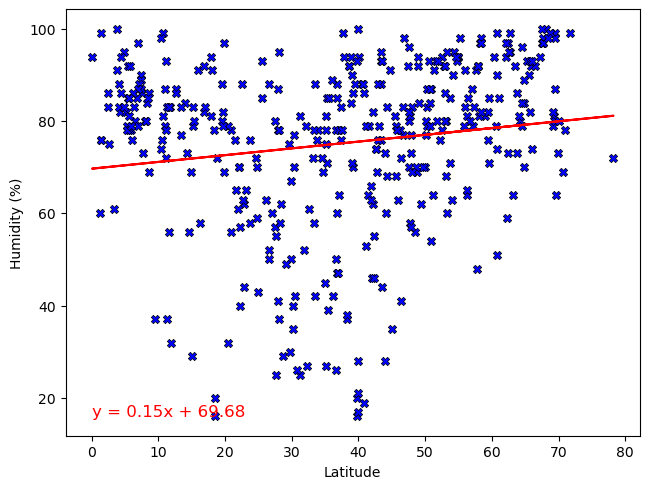

In [28]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

The r-value is: -0.006048982630468161


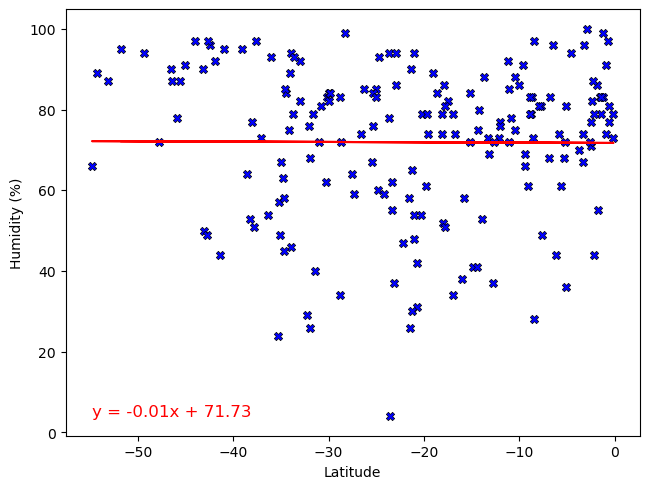

In [29]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

**Discussion about the linear relationship:** - Although there's little correlation between Latitude and Humidity, you can clearly see within the scatter plots that for both the Northern and Southern Hemisphere, city's located closest to the equator have Humidity levels > 60%.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07844782656650469


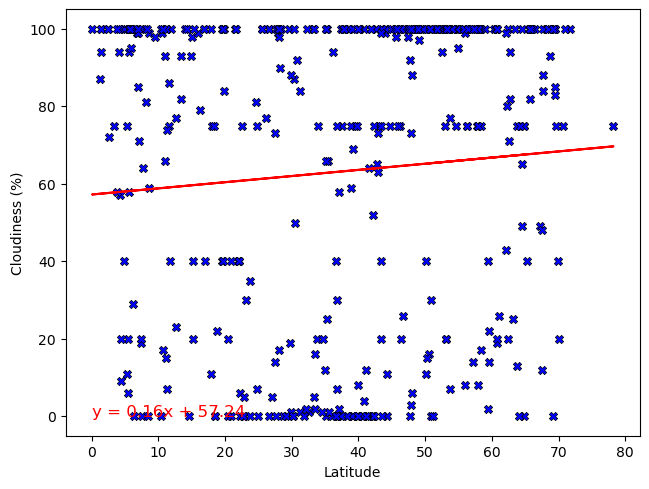

In [31]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

The r-value is: -0.12834915999979507


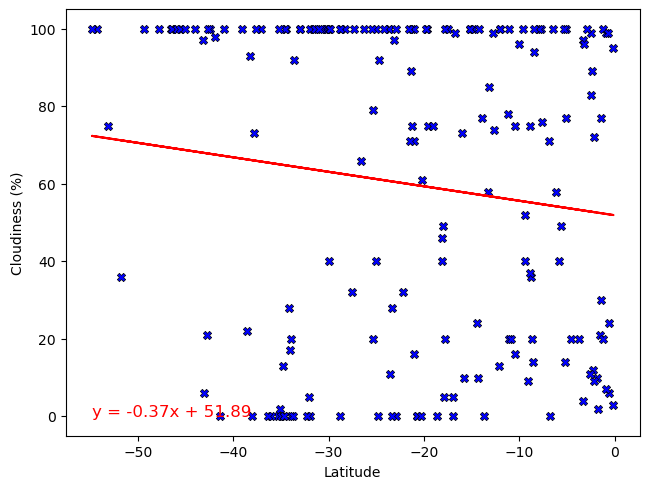

In [32]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

**Discussion about the linear relationship:**- Much like Humidity, there's very little correlation between Cloudiness and a City's Latitude.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.11468162807427448


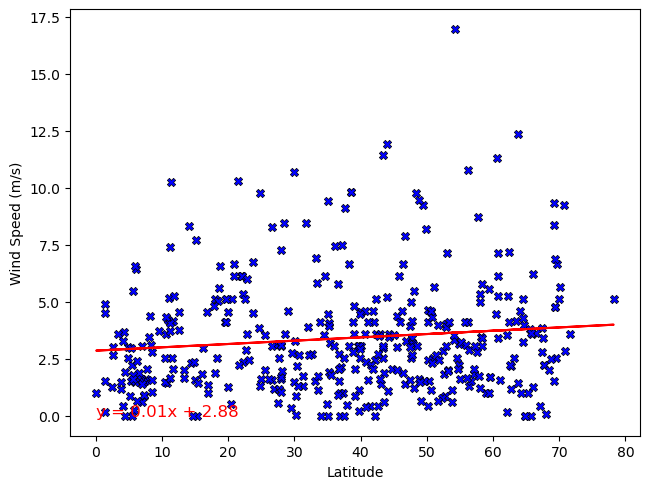

In [35]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

The r-value is: -0.242665861679534


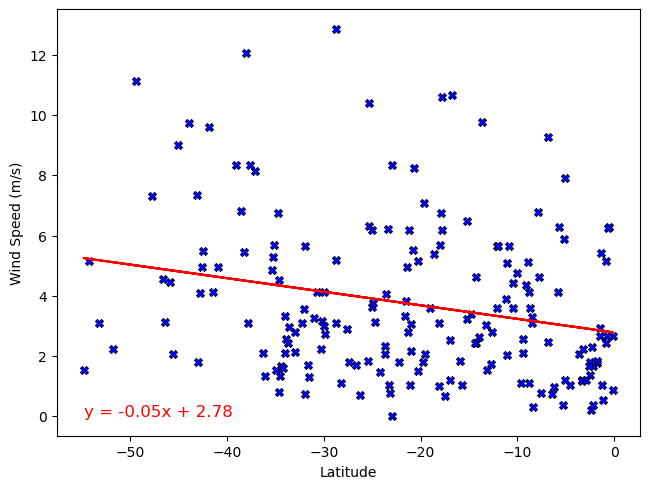

In [37]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# Additional plot titles
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

**Discussion about the linear relationship:** Again there's very little correlation between Wind Speed and City Latitude for both Northern and Southern Hemisphere Cities.